## Name: 

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np

# Loading the InstacartOrdersByDepartment dataset

Instacart is a grocery store delivery service. People place orders online, requested products are gathered at the grocery store, and delivered to the person’s location, sometimes within an hour. Instacart made data for several million of these orders publicly available on their website (https://www.instacart.com/datasets/grocery-shopping-2017 (Links to an external site.))

Each row is a summary of orders associated with a particular hour in the day and a particular department.
    1. order_hour_of_day: The hour of the day when the order was placed (0 = 12am, 1 = 1am etc)
    2. department: The department the products came from (e.g. alcohol, produce)
    3. num_orders_hour: The number of products ordered from this particular department during this particular hour.
    4. Tot_orders_dept: The total number of products ordered from this particular department across all hours of the day.
    
## The InstacartOrdersByDepartment.csv file is loaded in train variable using read_csv pandas method. 

In [20]:
train = pd.read_csv("InstacartOrdersByDepartment.csv")
train.head(10)

,order_hour_of_day,department,num_orders_hour,tot_orders_dept
0,0,alcohol,33.0,5598.0
1,1,alcohol,32.0,5598.0
2,2,alcohol,5.0,5598.0
3,3,alcohol,3.0,5598.0
4,4,alcohol,2.0,5598.0
5,5,alcohol,12.0,5598.0
6,6,alcohol,34.0,5598.0
7,7,alcohol,92.0,5598.0
8,8,alcohol,161.0,5598.0
9,9,alcohol,343.0,5598.0


# Columns and unique departments

### 1. The columns of the dataset:  'order_hour_of_day'    'department'    'num_orders_hour'  'tot_orders_dept'

### 2. Departments:  'alcohol'  'babies'  'bakery'  'beverages'  'breakfast'  'bulk'  'canned goods' 'dairy eggs' 'deli'  'dry goods pasta'  'frozen'  'household' 'international'  'meat seafood'  'missing'  'other'  'pantry'  'personal care'  'pets'  'produce'  'snacks'
### 3. Departments for food only:  'alcohol'  'bakery'   'beverages'   'breakfast'    'bulk'    'canned goods'   'dairy eggs'    'deli'    'dry goods pasta'   'frozen'   'meat seafood'   'pantry'   'snacks' 

In [21]:
print('The columns of the dataset: ',train.columns)
print('Departments: ',train.department.unique())

food_departments = ['alcohol','bakery','beverages','breakfast','bulk','canned goods','dairy eggs','deli','dry goods pasta','frozen','meat seafood','pantry', 
 'snacks']

print('Departments for food only: ',food_departments)

The columns of the dataset:  Index(['order_hour_of_day', 'department', 'num_orders_hour',
       'tot_orders_dept'],
      dtype='object')
Departments:  ['alcohol' 'babies' 'bakery' 'beverages' 'breakfast' 'bulk' 'canned goods'
 'dairy eggs' 'deli' 'dry goods pasta' 'frozen' 'household' 'international'
 'meat seafood' 'missing' 'other' 'pantry' 'personal care' 'pets' 'produce'
 'snacks']
Departments for food only:  ['alcohol', 'bakery', 'beverages', 'breakfast', 'bulk', 'canned goods', 'dairy eggs', 'deli', 'dry goods pasta', 'frozen', 'meat seafood', 'pantry', 'snacks']


# Data analysis 
## Research question: Do people order different foods at different times of day? 

### A new pandas dataframe is created and initialized with only the food departments indexed the labels (0 = 12 A.M. , 23 = 11 P.M. ) 

### The number  orders from particular food department during this particular hour is plotted using pandas plot method using both line and bar kind. 

### Visualization : It can be visualized that people generally do not order different foods at different times of day but with an exception for a breakfast (blue) and meat_seafood (pink). 

(0, 23)

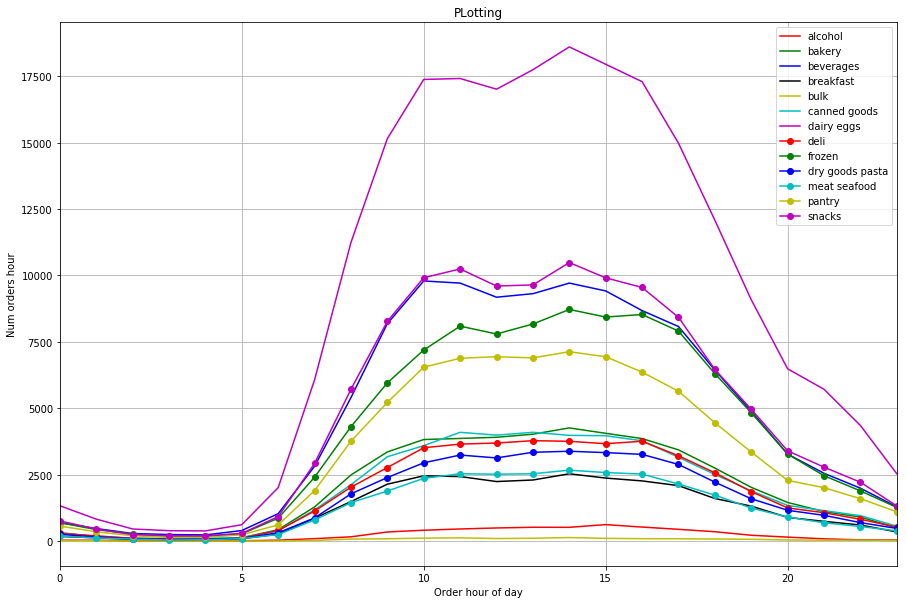

In [83]:
train.loc[~train['department'].isin(['babies','householdor','international','missing','other','personal care','pets','produce'])]  

alcohol= train[train['department'] == 'alcohol' ]
fig = alcohol.plot(x='order_hour_of_day',y='num_orders_hour',title='PLotting',grid = True, color='r',figsize = (10,10))



alcohol= train[train['department'] == 'bakery' ]
fig = alcohol.plot(x='order_hour_of_day',y='num_orders_hour',title='PLotting',grid = True, color='g',figsize = (10,10),ax=fig)

alcohol= train[train['department'] == 'beverages' ]
fig = alcohol.plot(x='order_hour_of_day',y='num_orders_hour',title='PLotting',grid = True, color='b',figsize = (10,10),ax=fig)

alcohol= train[train['department'] == 'breakfast' ]
fig = alcohol.plot(x='order_hour_of_day',y='num_orders_hour',title='PLotting',grid = True, color='k',figsize = (10,10),ax=fig)

alcohol= train[train['department'] == 'bulk' ]
fig = alcohol.plot(x='order_hour_of_day',y='num_orders_hour',title='PLotting',grid = True, color='y',figsize = (10,10),ax=fig)


alcohol= train[train['department'] == 'canned goods']
fig = alcohol.plot(x='order_hour_of_day',y='num_orders_hour',title='PLotting',grid = True, color='c',figsize = (10,10),ax=fig)

alcohol= train[train['department'] == 'dairy eggs']
fig = alcohol.plot(x='order_hour_of_day',y='num_orders_hour',title='PLotting',grid = True, color='m',figsize = (10,10),ax=fig)

alcohol= train[train['department'] == 'deli']
fig = alcohol.plot(x='order_hour_of_day',y='num_orders_hour',title='PLotting',grid = True, color='r',marker='o',figsize = (10,10),ax=fig)

alcohol= train[train['department'] == 'frozen']
fig = alcohol.plot(x='order_hour_of_day',y='num_orders_hour',title='PLotting',grid = True, color='g',marker='o',figsize = (10,10),ax=fig)

alcohol= train[train['department'] == 'dry goods pasta']
fig = alcohol.plot(x='order_hour_of_day',y='num_orders_hour',title='PLotting',grid = True, color='b',marker='o',figsize = (10,10),ax=fig)

alcohol= train[train['department'] == 'meat seafood']
fig = alcohol.plot(x='order_hour_of_day',y='num_orders_hour',title='PLotting',grid = True, color='c',marker='o',figsize = (10,10),ax=fig)

alcohol= train[train['department'] == 'pantry']
fig = alcohol.plot(x='order_hour_of_day',y='num_orders_hour',title='PLotting',grid = True, color='y',marker='o',figsize = (10,10),ax=fig)

alcohol= train[train['department'] == 'snacks']
fig = alcohol.plot(x='order_hour_of_day',y='num_orders_hour',title='PLotting',grid = True, color='m',marker='o',figsize = (15,10),ax=fig)

fig.legend(['alcohol','bakery','beverages','breakfast','bulk','canned goods','dairy eggs','deli','frozen','dry goods pasta','meat seafood','pantry','snacks'])
fig.set_xlabel('Order hour of day')
fig.set_ylabel('Num orders hour')
fig.set_xlim([0,23])


## Does people buy alcohol more than beverages at different times of the day?
### Answer: It is clear from the graph that people always order beverages more at different times of the day. From the graph of alcohol it can be said that people order almost same orders at different time of the day,on the contrary people orders most of their beverages at around 8 A. M. to 4 P. M.

(0, 23)

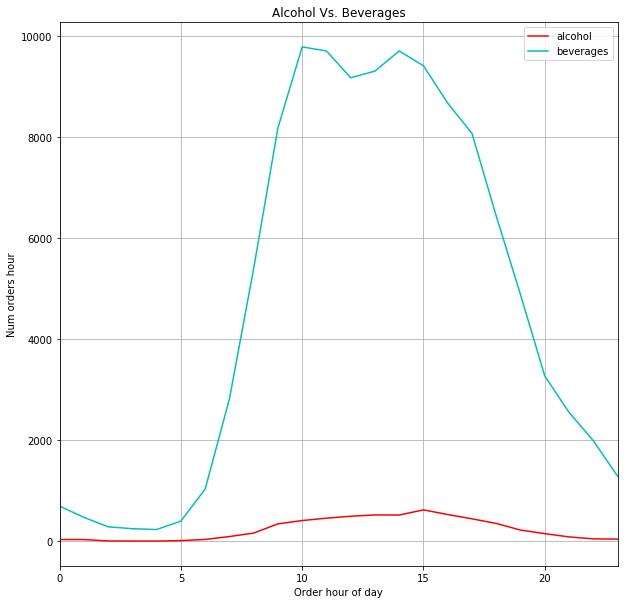

In [92]:
temp= train[train['department'] == 'alcohol' ]
fig = temp.plot(x='order_hour_of_day',y='num_orders_hour',title='PLotting',grid = True, color='r',figsize = (10,10))

temp= train[train['department'] == 'beverages']
fig = temp.plot(x='order_hour_of_day',y='num_orders_hour',title='Alcohol Vs. Beverages',grid = True, color='c',figsize = (10,10),ax=fig)


fig.legend(['alcohol','beverages'])
fig.set_xlabel('Order hour of day')
fig.set_ylabel('Num orders hour')
fig.set_xlim([0,23])

## Result:
### 1. From 7 A. M. to 10 A. M. people order more breakfast than meat and seafood. 
### 2. From 11 A. M. to 6 P. M. people order meat and seafood more than breakfast.  

(0, 23)

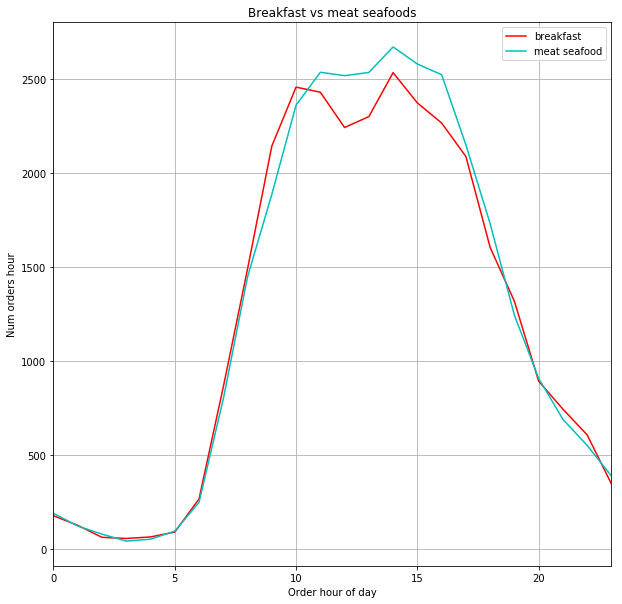

In [93]:
temp= train[train['department'] == 'breakfast' ]
fig = temp.plot(x='order_hour_of_day',y='num_orders_hour',title='PLotting',grid = True, color='r',figsize = (10,10))

temp= train[train['department'] == 'meat seafood']
fig = temp.plot(x='order_hour_of_day',y='num_orders_hour',title='Breakfast vs meat seafoods',grid = True, color='c',figsize = (10,10),ax=fig)


fig.legend(['breakfast','meat seafood'])
fig.set_xlabel('Order hour of day')
fig.set_ylabel('Num orders hour')
fig.set_xlim([0,23])


## Explanation of the results:
### The result make sense before in the morning people are more likely to buy breakfast than meat-seafoods and in the afternoon people are less likely to buy breakfast and more likely to buy meat and seafoods for supper or dinner. 

## Take away message:
### It is found that there is more demand for  breakfast than meat-seafoods in the morning so keeping a balanced supply at different times is important for these two items

## Limitations:
### 1. Data does not tell anything about demand for a particular food item, it shows the relation of orders 
